## 1) Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load csv file
df_count = pd.read_csv('dataset/count_data.csv', na_values="na")
df_song = pd.read_csv('dataset/song_data.csv', na_values="na")

In [3]:
df_song

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


In [4]:
df_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999984 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [5]:
df_count

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...,...
1999995,1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


In [6]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
# There is no need of first column "Unnamed: 0" hence it can be dropped
df_count.drop('Unnamed: 0', axis= 1, inplace = True)

In [8]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   song_id     object
 2   play_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [9]:
# Checking if we have any null values in the df_count dataset
df_count.isnull().sum()

user_id       0
song_id       0
play_count    0
dtype: int64

In [10]:
# Checking if we have any null values in the df_song dataset
df_song.isnull().sum()

song_id         0
title          16
release         5
artist_name     0
year            0
dtype: int64

In [11]:
df_song['year'].nunique()

90

In [12]:
df_song['year'].unique()

array([2003, 1995, 2006,    0, 1993, 2007, 1997, 2005, 1998, 1994, 2009,
       1996, 2001, 2004, 2002, 1977, 2008, 1992, 1979, 1988, 2010, 1990,
       1981, 2000, 1978, 1991, 1989, 1999, 1975, 1969, 1982, 1966, 1972,
       1967, 1984, 1950, 1986, 1970, 1959, 1971, 1980, 1987, 1985, 1963,
       1973, 1958, 1961, 1938, 1939, 1983, 1929, 1964, 1948, 1968, 1976,
       1965, 1960, 1974, 1945, 1962, 1957, 1956, 1954, 1943, 1952, 1953,
       1955, 1951, 1931, 1928, 1937, 1949, 1935, 1941, 1947, 1934, 1940,
       1926, 1932, 1922, 1930, 1936, 1942, 1944, 1933, 1946, 1927, 2011,
       1925, 1924], dtype=int64)

In [13]:
df_song['year'].value_counts().head(20)

0       484424
2007     39414
2006     37546
2005     34960
2008     34770
2009     31051
2004     29618
2003     27389
2002     23472
2001     21604
2000     19293
1999     18262
1998     15858
1997     15182
1996     14135
1995     13260
1994     12127
1993     10529
1992      9547
2010      9397
Name: year, dtype: int64

In [14]:
df_song[df_song['year'] == 0]

,song_id,title,release,artist_name,year
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0
...,...,...,...,...,...
999994,SOVRJOO12A8C143C7A,Down Fo' The Kick Doe,Messy Marv Presents: Draped Up and Chipped Out...,Killer Mike feat. Gangsta Pill and Nario of Gr...,0
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0


# we do see we have 484k records where year of songs is 0
we will create the barchart without these records

In [15]:
df_song_year1 = df_song['year'].value_counts()[1:20]
df_song_year1

2007    39414
2006    37546
2005    34960
2008    34770
2009    31051
2004    29618
2003    27389
2002    23472
2001    21604
2000    19293
1999    18262
1998    15858
1997    15182
1996    14135
1995    13260
1994    12127
1993    10529
1992     9547
2010     9397
Name: year, dtype: int64

In [16]:
df_song_year2 = pd.Series(df_song_year1).reset_index()
df_song_year2.columns = ['Year', 'Count']

In [17]:
df_song_year2.sort_values(by = "Year")

,Year,Count
17,1992,9547
16,1993,10529
15,1994,12127
14,1995,13260
13,1996,14135
12,1997,15182
11,1998,15858
10,1999,18262
9,2000,19293
8,2001,21604


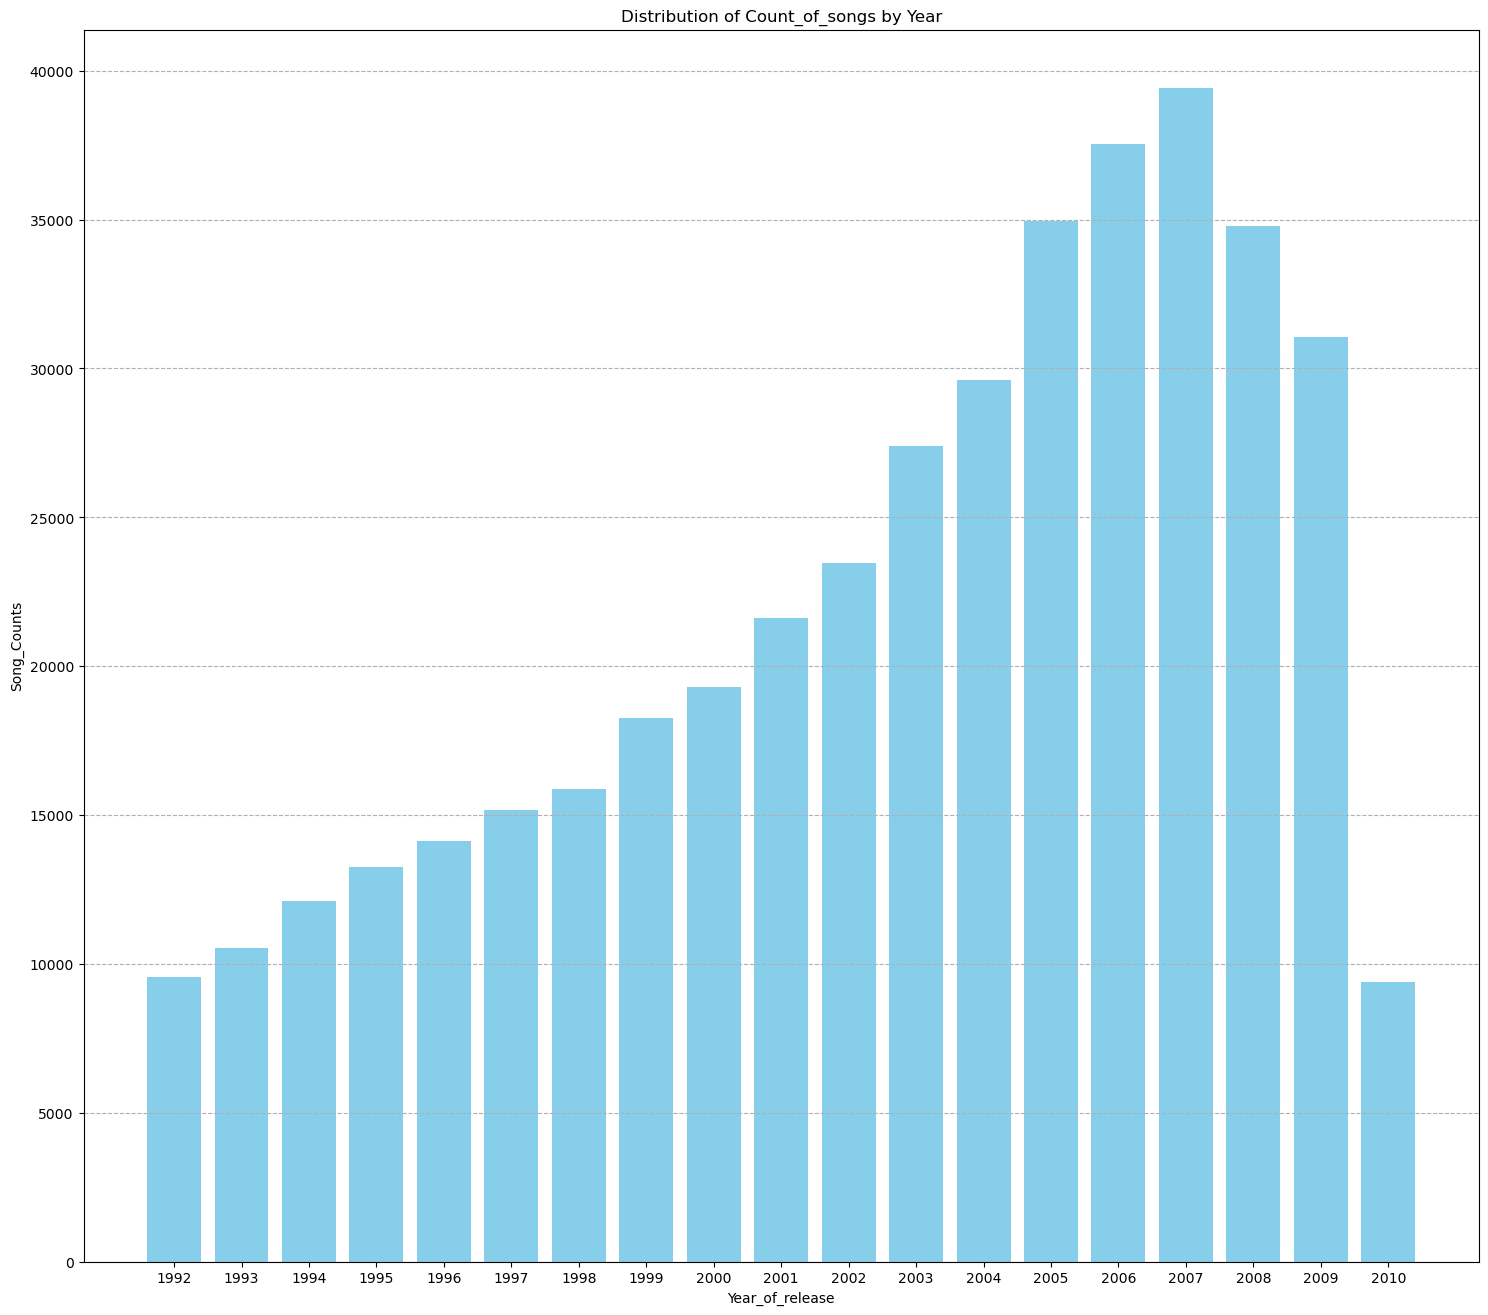

In [18]:
# Creating the bar plot
plt.figure(figsize=(18, 16))
plt.title('Distribution of Count_of_songs by Year')
plt.xlabel('Year_of_release')
plt.ylabel('Song_Counts')
plt.xticks(rotation=0)

plt.xticks(df_song_year2['Year'])

plt.grid(axis='y', linestyle='--', alpha=1.0)
plt.bar(df_song_year2['Year'].astype(int), df_song_year2['Count'], color='skyblue')
plt.show()


In [19]:
df_song[df_song['song_id'].duplicated()]

,song_id,title,release,artist_name,year
18309,SOPFBUZ12AF729C896,Spitting Games,Final Straw,Snow Patrol,2003
32760,SOJHKXX12A8C139798,A Crow Left Of The Murder,Live in Malaysia 2004,Incubus,2004
33033,SOLTAEJ12A8C13F793,What If I Do?,In Your Honor,Foo Fighters,2005
49718,SONEJDQ12A6D4FA71C,Starfighter Pilot,Songs For Polarbears,Snow Patrol,1998
54218,SONVJUL12A6701FB7A,The Damage In Your Heart,Make Believe,Weezer,2005
...,...,...,...,...,...
997476,SOCGXXL12B0B808865,Yesterdays,Greatest Hits,Guns N' Roses,1991
998785,SOEUIVS12A8C1400E3,Someone Put Your Hand Out,King Of Pop,Michael Jackson,1992
999365,SORANLE12A6310DBC8,Long Way To Go,Love Angel Music Baby,Gwen Stefani / Andre 3000,0
999643,SOAPUFN12AB017FF03,Suggestions,System Of A Down (Bonus Pack),System of a Down,1998


In [28]:
df_song['song_id'].duplicated().sum()

944

In [27]:
df_song['title'].duplicated().sum()

297572

In [29]:
df_song['release'].duplicated().sum()

850711

In [30]:
df_song.duplicated().sum()

498

In [ ]:
df_song[df_song['song_id']== 'SOPFBUZ12AF729C896']

In [ ]:
df_song.drop_duplicates(subset='song_id', keep='first', inplace=True)

In [ ]:
df_song[df_song['song_id'].duplicated()]